In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import numpy as np
X=2*np.random.rand(100,1)
y= 4+3*X +np.random.randn(100,1)

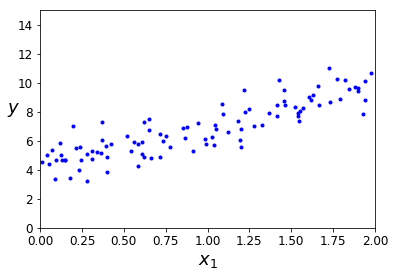

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

In [5]:
# Normal Equation. To compute the parameters that will reduce the cost function

X_b = np.c_[np.ones((100,1)),X]
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
# make predictions using theta 
X_new= np.array([[0],[2]])
X_new_b= np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

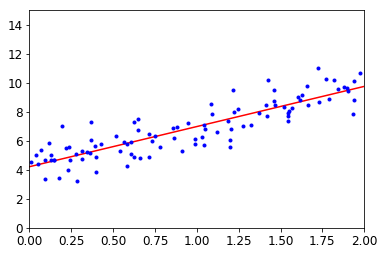

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
# Now lets do it with sklearn kit
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
#Batch Gradient
eta=0.1 # To find a good learning rate you can use grid search.
n_iterations=1000
m=100
theta=np.random.rand(2,1)

In [11]:
for iteration in range(n_iterations):
    gradients=(2/m)*(X_b.T.dot(X_b.dot(theta)-y))
    theta=theta - (eta*gradients)

print(theta)

[[4.21509616]
 [2.77011339]]


In [12]:
# Stochastic Gradient Deschent

n_epochs=50
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m + i)
        theta= theta-(eta*gradients)

In [13]:
# This is a linear regresor using Stochastic gradient descent with scikit-learn
from sklearn.linear_model import SGDRegressor
sgd_reg= SGDRegressor(n_iter=50, penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())
print(sgd_reg.intercept_,sgd_reg.coef_)

[4.2287996] [2.79011436]


c:\users\pc42630\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


# Polinomial Regression

In [52]:
m=100
X=6 * np.random.rand(m,1) -3
y= 0.6*X**2 + X+ 2 + np.random.randn(m,1)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.78180596]), array([[1.07378662, 0.66130848]]))

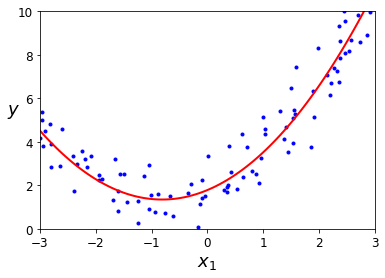

In [53]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

array([[-3.        ],
       [-2.93939394]])

In [58]:
# Generating a model's learning curve

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])# starts "acumulating" trianing data
        y_train_predict= model.predict(X_train[:m])
        y_val_predict= model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),"b-", linewidth=3, label="val")

[0, 80, 0, 3]

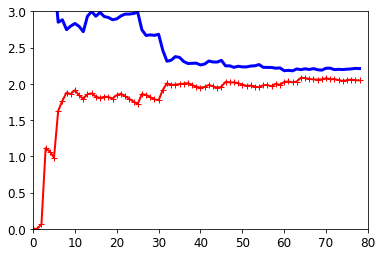

In [63]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0, 80, 0, 3]) 


[0, 80, 0, 3]

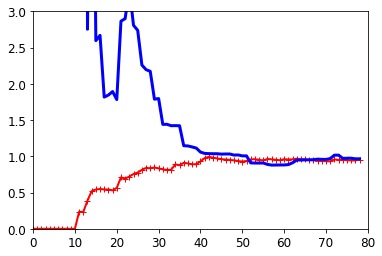

In [62]:
# 10th degree polinomial model
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10,include_bias=False)),
    ("sgd_reg",LinearRegression()),
))

plot_learning_curves(polynomial_regression,X,y)
plt.axis([0, 80, 0, 3]) 
